In [8]:
import pandas as pd
import numpy as np

x_train = pd.read_csv('CompleteDataSet/x_train_all.csv')  

summary_stats = x_train.describe()
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


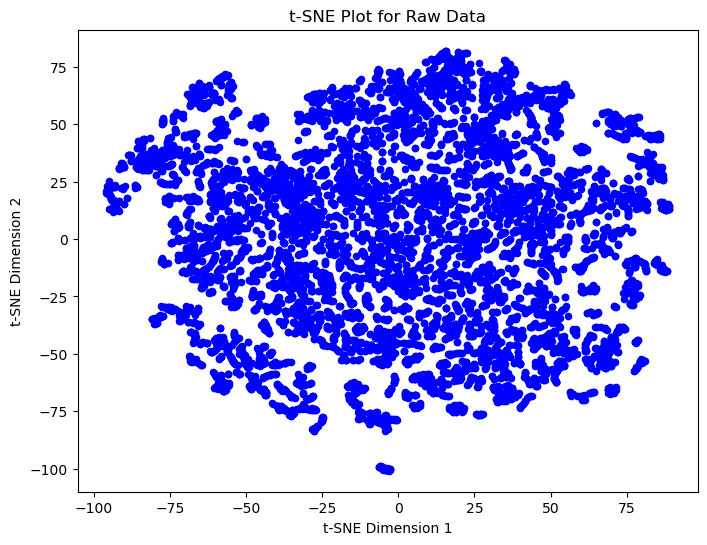

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

raw_data = x_train.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(raw_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [10]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# p_df = pd.read_csv('processed_df2.csv')
# p_df.shape

In [11]:
def grayscale_to_infrared(grayscale_image):
    row = np.array(grayscale_image, dtype=np.uint8)
    color_map = plt.get_cmap('hot')
    normalized_image = row / 255.0
    infrared_image = (color_map(normalized_image)[:, :, 0] * 255).astype(np.uint8)
    return infrared_image.flatten()

In [12]:
infrared_original = []

for i, idx in enumerate(x_train.index):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_org = pd.DataFrame(infrared_original)
infrared_df_org.shape

(9690, 2304)

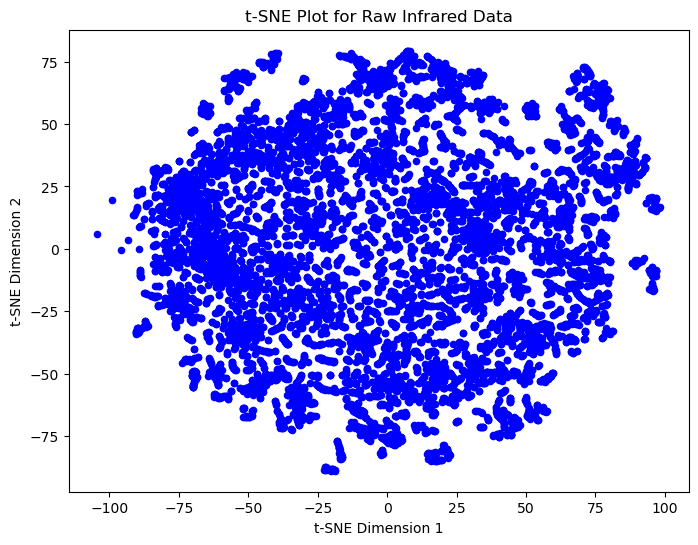

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


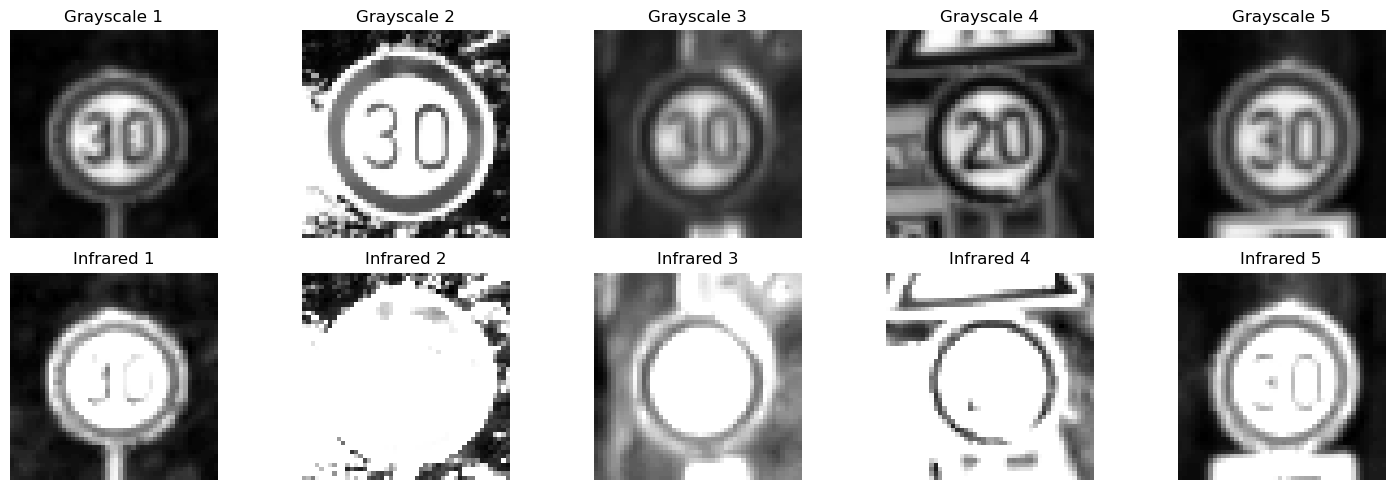

In [14]:
sample_size = 5
sample_indices = np.random.choice(range(len(infrared_df_org)), sample_size, replace=False)

x_train_reset = infrared_df_org.reset_index(drop=True)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    processed_image = x_train_reset.iloc[idx].values.reshape(48, 48)

    plt.subplot(2, sample_size, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Grayscale {i+1}')
    plt.axis('off')

    plt.subplot(2, sample_size, sample_size + i + 1)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f'Infrared {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.cluster import KMeans,AgglomerativeClustering

def kmeansfunc(data, k):
    kmeans = AgglomerativeClustering(n_clusters=k, )
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    # print("Inertia: ", kmeans.inertia_)
    return clusters

In [16]:
from sklearn.metrics import silhouette_score

def silhouetteScore(data, clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    print("Silhouette Score:", silhouette_avg)

In [17]:
clusters = kmeansfunc(infrared_df_org, 10)
silhouetteScore(infrared_df_org,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.10424093019253086


In [18]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in x_train.columns]
infrared_copy = x_train.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_no_outliers = infrared_copy.drop(outlier_indices)
infra_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

In [19]:
clusters = kmeansfunc(infra_no_outliers, 10)
silhouetteScore(infra_no_outliers,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08265232233522116


In [20]:
mean=infra_no_outliers.mean()
std=infra_no_outliers.std()
infra_norm=(infra_no_outliers-mean)/std

In [21]:
clusters = kmeansfunc(infra_norm, 10)
silhouetteScore(infra_norm,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.08682438504803372


In [22]:
mean=x_train.mean()
std=x_train.std()
x_norm=(x_train-mean)/std

In [23]:
infrared_original = []

for i, idx in enumerate(x_norm.index):
    original_image = x_norm.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_norm = pd.DataFrame(infrared_original)
infrared_df_norm.shape

(9690, 2304)

In [24]:
clusters = kmeansfunc(infrared_df_norm, 10)
silhouetteScore(infrared_df_norm,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46254749032402126


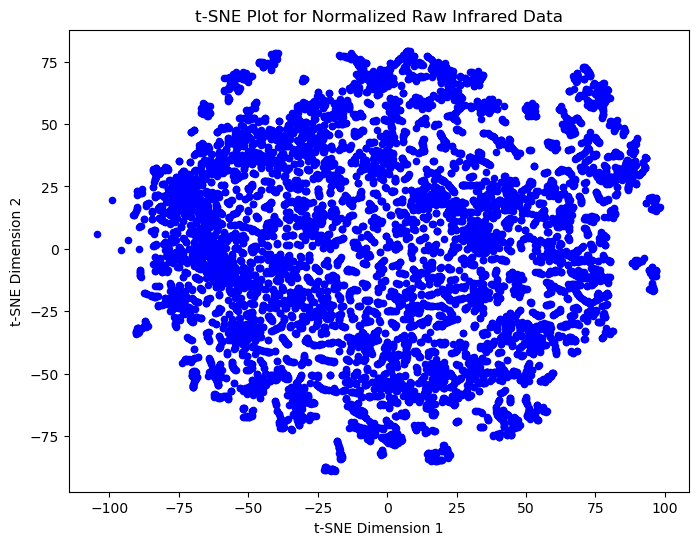

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Normalized Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [26]:
from sklearn.ensemble import IsolationForest

feature_names = [f'feature_{str(col)}' for col in infrared_df_norm.columns]
infrared_copy = infrared_df_norm.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_norm_no_outliers = infrared_copy.drop(outlier_indices)

In [27]:
clusters = kmeansfunc(infra_norm_no_outliers, 10)
silhouetteScore(infra_norm_no_outliers,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.46638652388869367


In [28]:
from sklearn.cluster import KMeans
# wcss = [] 
# for i in range(1, 21): 
#     kmeans = AgglomerativeClustering(n_clusters = i)
#     kmeans.fit(infra_norm_no_outliers) 
#     # wcss.append(kmeans)

# plt.plot(range(1, 21), wcss)
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS') 
# plt.show()

In [29]:
clusters = kmeansfunc(infra_norm_no_outliers, 2)
silhouetteScore(infra_norm_no_outliers,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.658983680565739


In [30]:
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    row = np.array(row, dtype=np.uint8)
    row = cv2.GaussianBlur(row, kernel_size, sigma)
    return row

def apply_clahe(row):
    row = np.array(row, dtype=np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized_row = clahe.apply(row)
    return equalized_row

In [31]:
infrared_prep = []

for index, row in infra_norm_no_outliers.iterrows():
    image_data = row.values
    gaussian_image = apply_gaussian_blur(image_data)
    equalized_image = apply_clahe(gaussian_image)
    infrared_prep.append(equalized_image.flatten())

prepped_infrared_df = pd.DataFrame(infrared_prep)
prepped_infrared_df.shape

(9593, 2304)

In [32]:
infra_norm_no_outliers.shape

(9593, 2304)

In [33]:
def kmeansfunc_iter(data, k, seed):
    kmeans = AgglomerativeClustering(n_clusters=k)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print(clusters)
    return clusters

def silhouetteScore_iter(data,clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    return silhouette_avg

In [34]:
clusters = kmeansfunc(prepped_infrared_df, 10)
silhouetteScore(prepped_infrared_df,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.44571711187269836


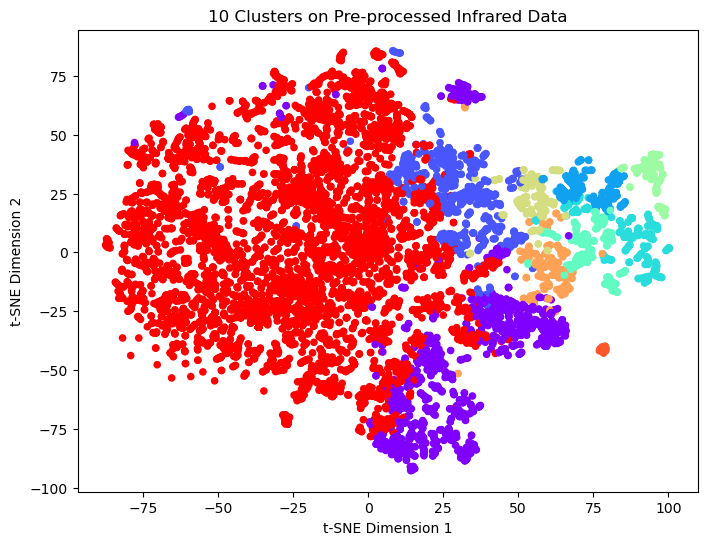

In [35]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [36]:
clusters = kmeansfunc(prepped_infrared_df, 2)
silhouetteScore(prepped_infrared_df,clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6865004553787922


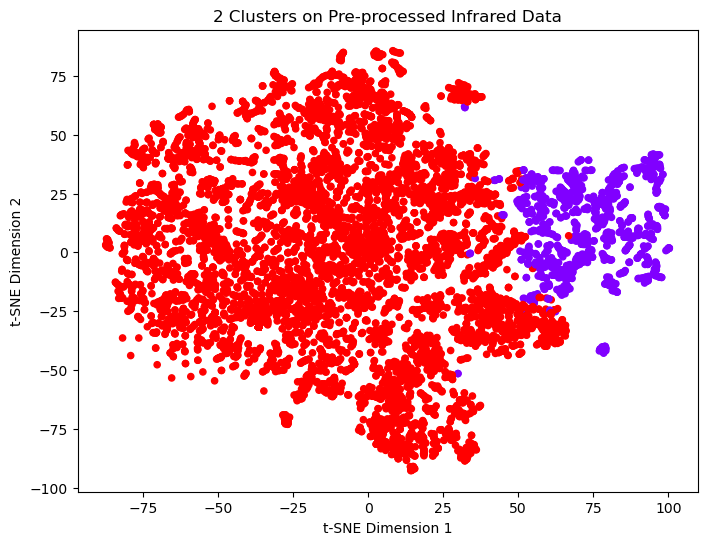

In [37]:
infrared_data = prepped_infrared_df.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def PCAOnData(features,components):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    return df_pca

In [39]:
df_pca_50 = PCAOnData(infra_norm_no_outliers, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 10)
silhouetteScore(df_pca_50, clusters_pca50)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5327799587652378


In [40]:
df_pca_50 = PCAOnData(infra_norm_no_outliers, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 2)
silhouetteScore(df_pca_50, clusters_pca50)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7282533126497821


In [41]:
image_df = infra_norm_no_outliers.copy()

In [42]:
import cv2
import pandas as pd
import numpy as np

# Assuming 'image_df' is your DataFrame with each row as an image

# Create a list to store the Fourier Transformed images
fourier_transformed_images = []

# Iterate through each row (image) in the DataFrame
for index, row in image_df.iterrows():
    # Convert the row (image) to a NumPy array
    image = row.values.reshape(48, 48)

    # Apply DFT to the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency components to the center
    dft_shifted = np.fft.fftshift(dft)

    # Calculate the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Flatten the magnitude spectrum to 1D
    flattened_magnitude_spectrum = magnitude_spectrum.flatten()

    # Append the flattened magnitude spectrum to the list
    fourier_transformed_images.append(flattened_magnitude_spectrum)

# Create a new DataFrame from the Fourier Transformed images
fourier_df = pd.DataFrame(fourier_transformed_images)

# The 'fourier_df' DataFrame now contains the magnitude spectra of the images


In [43]:
fourier_df.shape

(9593, 2304)

In [44]:
pca_50 = PCAOnData(fourier_df, 50)
clusters = kmeansfunc(pca_50, 10)
silhouetteScore(pca_50, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4302251


In [45]:
image_df = fourier_df.copy()

In [46]:
import numpy as np
import cv2  # Make sure you have OpenCV installed

# Define a function to emphasize lower frequencies using DCT
def emphasize_lower_frequencies(image, keep_ratio=0.1):
    # Apply DCT
    dct = cv2.dct(np.float32(image))

    # Determine the threshold to retain keep_ratio of the coefficients
    sorted_dct = np.sort(np.abs(dct), axis=None)
    threshold = sorted_dct[int(keep_ratio * sorted_dct.size)]

    # Zero out high-frequency coefficients
    dct[np.abs(dct) < threshold] = 0

    # Apply inverse DCT to get the filtered image
    filtered_image = cv2.idct(dct)
    
    return filtered_image


In [47]:
image_df = prepped_infrared_df.copy()

filtered_images = []

for index, row in image_df.iterrows():
    image_data = row.values
    filtered_image = emphasize_lower_frequencies(image_data, keep_ratio=0.1)
    filtered_images.append(equalized_image.flatten())

filtered_df = pd.DataFrame(filtered_images)
filtered_df.shape

(9593, 2304)

In [48]:
image_df = prepped_infrared_df.copy()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data_normalized = scaler.fit_transform(image_df)

In [50]:
clusters = kmeansfunc(scaled_data_normalized, 10)
silhouetteScore(scaled_data_normalized, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.22555064915835527


In [51]:
import cv2

def apply_median_filter(image, kernel_size=37):
    return cv2.medianBlur(image, kernel_size)

def apply_gaussian_blur_cv(image, kernel_size=(15, 15)):
    return cv2.GaussianBlur(image, kernel_size, 0)

def apply_bilateral_filter(image, diameter=25, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [52]:
image_df = prepped_infrared_df.copy()
infrared_prep2 = []

for index, row in image_df.iterrows():
    image_data = row.values
    median_image = apply_median_filter(image_data)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    median_image = apply_median_filter(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    infrared_prep2.append(gaussian_image.flatten())

prepped_infrared_df2 = pd.DataFrame(infrared_prep2)
prepped_infrared_df2.shape

(9593, 2304)

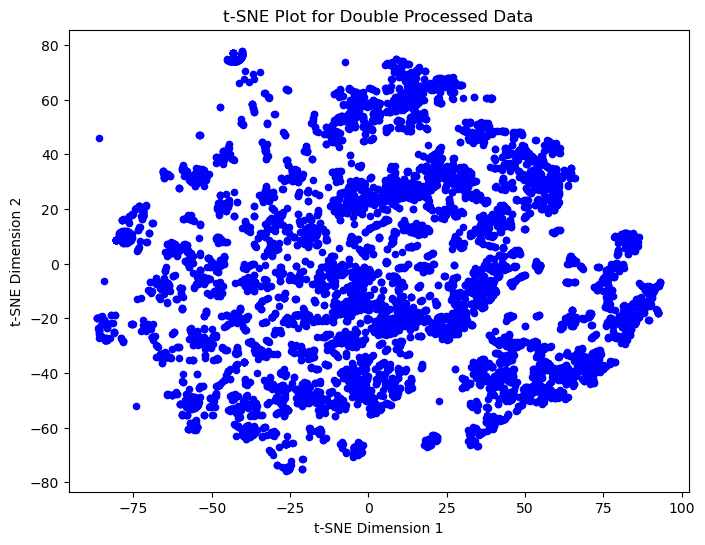

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df2.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [54]:
clusters = kmeansfunc(prepped_infrared_df2, 10)
silhouetteScore(prepped_infrared_df2, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.786266646588159


In [55]:
clusters = kmeansfunc(prepped_infrared_df, 2)
silhouetteScore(prepped_infrared_df, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6865004553787922


In [56]:
pca_50 = PCAOnData(prepped_infrared_df2, 50)

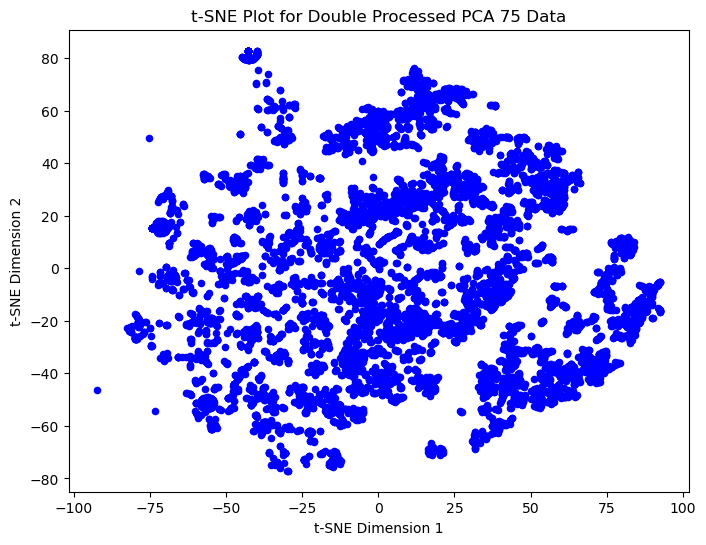

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(pca_50)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed PCA 75 Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [58]:
clusters = kmeansfunc(pca_50, 10)
silhouetteScore(pca_50, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6853533781940437


In [59]:
clusters = kmeansfunc(pca_50, 2)
silhouetteScore(pca_50, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8757649874093495


In [60]:
clusters = kmeansfunc(pca_50, 5)
silhouetteScore(pca_50, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8245813026674472


In [61]:
pca_3 = PCAOnData(prepped_infrared_df2,3)

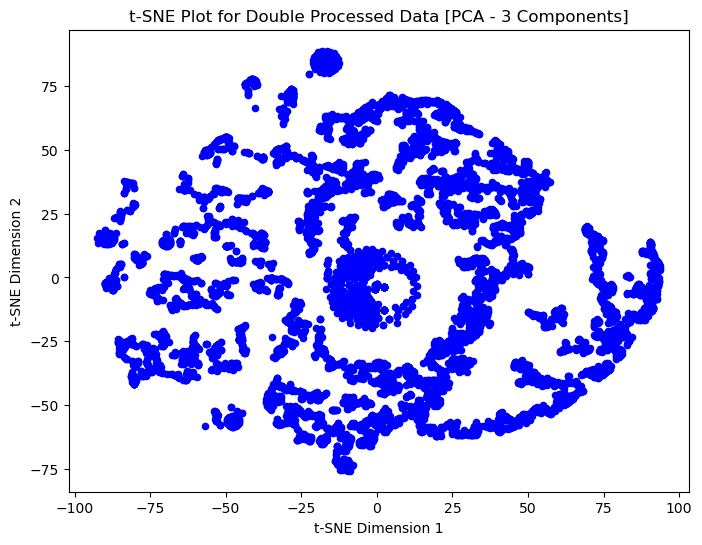

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

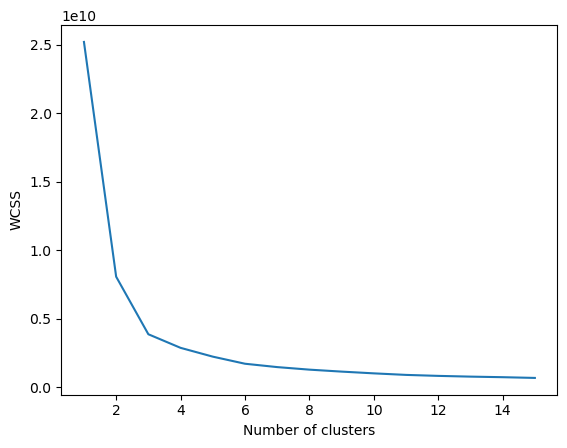

In [63]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(pca_3) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [64]:
clusters = kmeansfunc(pca_3, 10)
silhouetteScore(pca_3, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7828176403824704


In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def scatterplots(data,clusterlabels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterlabels, cmap='rainbow')
    plt.show()

#### To whoever is reading this; I have attached two visualizaitons. One is Tahir's scatterplot visualizaiton, and the other is my t-SNE visualizaiton. For some reason, both visualizations imply very different clustering. Normally, I would look into it but it's 2 AM and I can't be bothered. 

#### We need to get rid of one of these visualizations (the faulty one) as it is misleading. So kindly look into it and let us know what you observe, much appreciated.

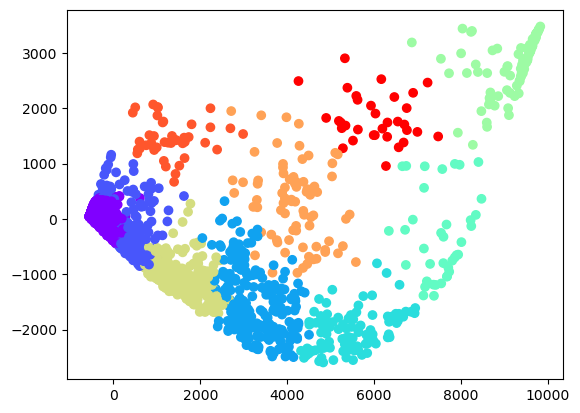

In [66]:
scatterplots(pca_3,clusters)

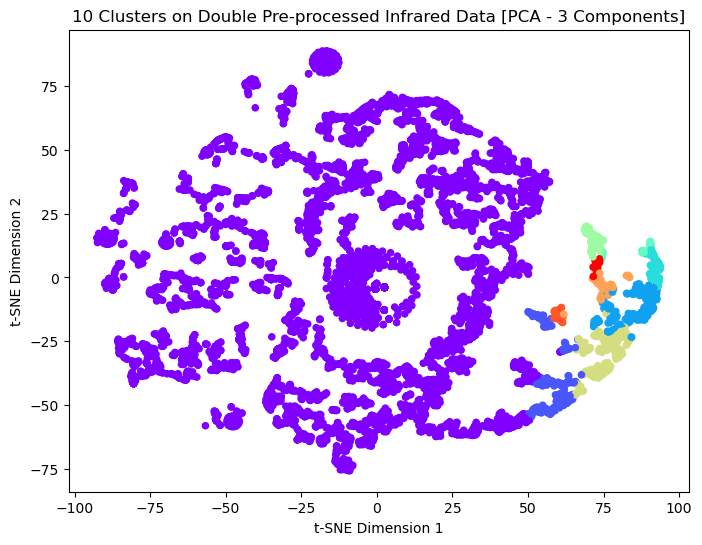

In [67]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [68]:
clusters = kmeansfunc(pca_3, 2)
silhouetteScore(pca_3, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8915941880590328


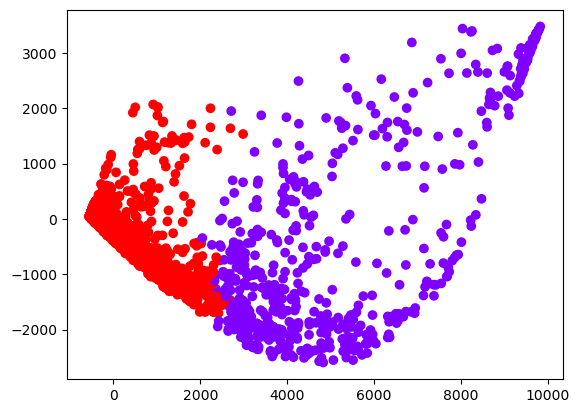

In [69]:
scatterplots(pca_3,clusters)

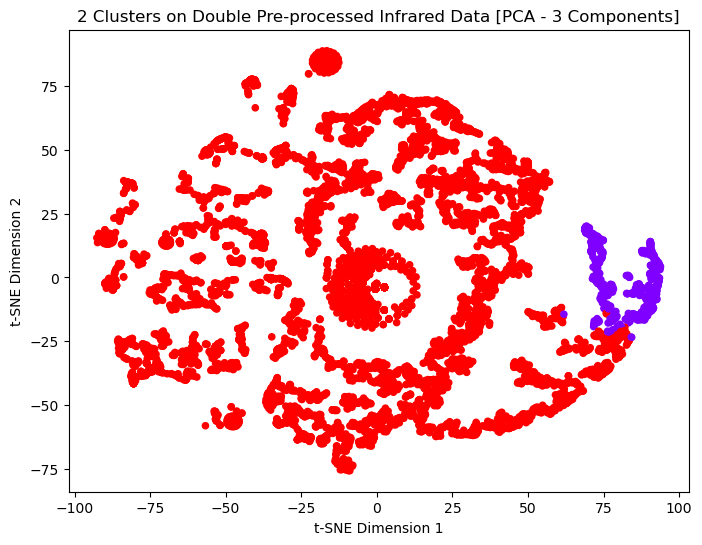

In [70]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [71]:
clusters = kmeansfunc(pca_3, 5)
silhouetteScore(pca_3, clusters)

c:\Users\mujta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8228564993799735


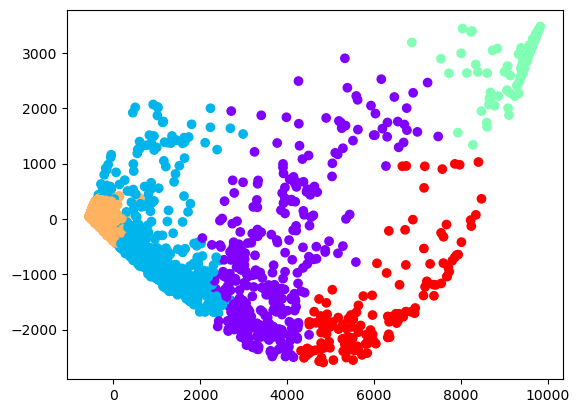

In [72]:
scatterplots(pca_3,clusters)

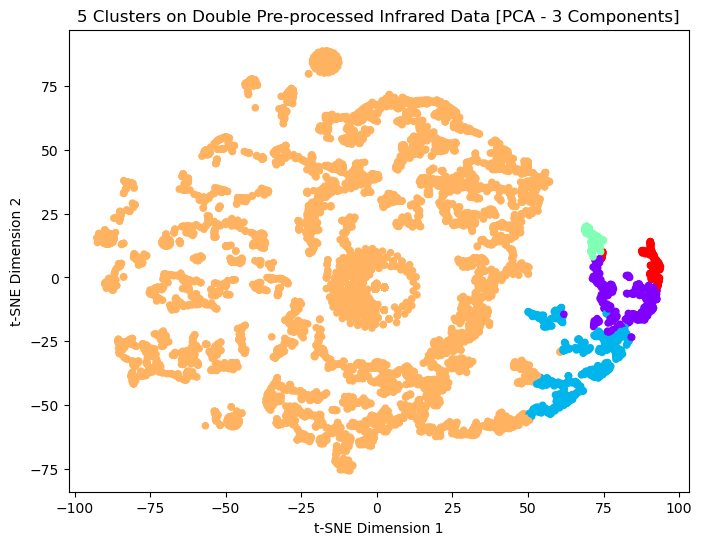

In [73]:
infrared_data = pca_3.to_numpy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [74]:
import umap.umap_ as umap

data_df = prepped_infrared_df2.copy()
umap_model = umap.UMAP(n_components=2)
reduced_data = umap_model.fit_transform(data_df)


ModuleNotFoundError: No module named 'umap'

In [ ]:
clusters = kmeansfunc(reduced_data, 10)
silhouetteScore(reduced_data, clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Inertia:  55753.46484375
Silhouette Score: 0.5186502


In [ ]:
from sklearn.random_projection import GaussianRandomProjection

data_df = prepped_infrared_df2.copy()
rp = GaussianRandomProjection(n_components=1000)
reduced_data = rp.fit_transform(data_df)

In [ ]:
clusters = kmeansfunc(reduced_data, 10)
silhouetteScore(reduced_data, clusters)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  3769652323.9351516


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.7688673677302436


In [ ]:
from sklearn.manifold import Isomap
data_df = prepped_infrared_df2.copy()
isomap = Isomap(n_components=50)
reduced_data = isomap.fit_transform(data_df)


/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


## Highest accuracies thus far:

In [ ]:
iso_df = prepped_infrared_df2.copy()

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
iso_data = isomap.fit_transform(iso_df)


/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [ ]:
clusters_10 = kmeansfunc(iso_data, 10)
silhouetteScore(iso_data, clusters_10)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  5945987093.679822


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8479174738868729


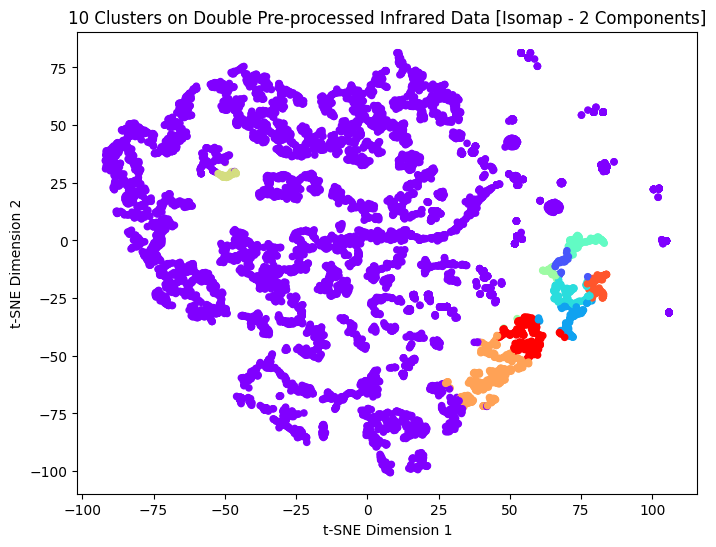

In [ ]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
clusters_2 = kmeansfunc(iso_data, 2)
silhouetteScore(iso_data, clusters_2)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  44583064876.33247


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9109522225808098


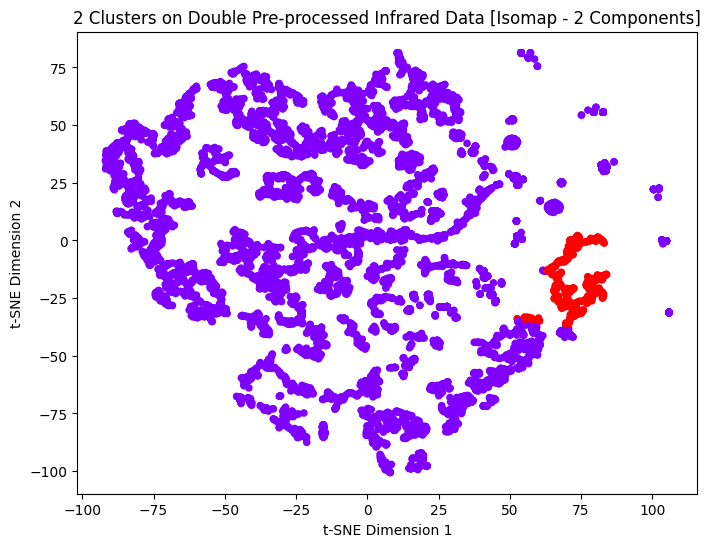

In [ ]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
clusters_5 = kmeansfunc(iso_data, 5)
silhouetteScore(iso_data, clusters_5)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia:  12390569773.28801


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8791488176597337


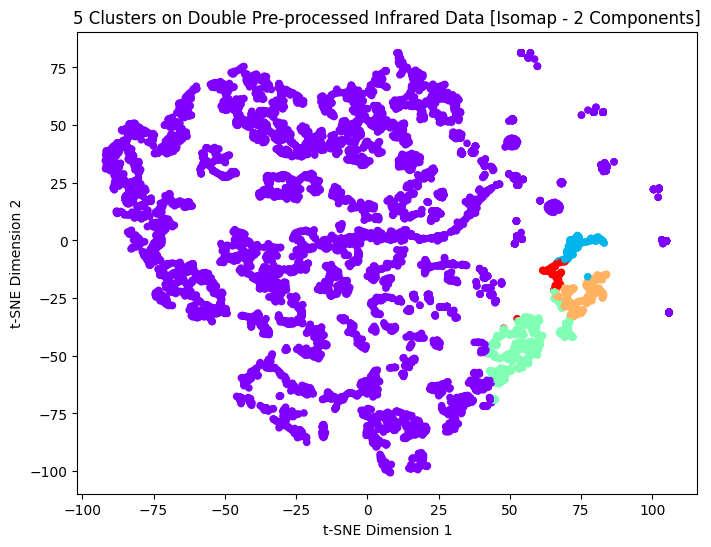

In [ ]:
infrared_data = iso_data.copy()

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_5, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()